In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random

df = pd.read_csv("flaredown_trackable_data_080316.csv")
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

print df.head(10)

   user_id checkin_date  trackable_id trackable_type      trackable_name  \
0        3   2015-11-26          1069      Condition  Ulcerative colitis   
1        6   2015-11-26          1069      Condition  Ulcerative colitis   
2        8   2015-06-22           269      Condition     Crohn's disease   
3        9   2015-05-26           421      Condition       Gastroparesis   
4        9   2015-05-26           152        Symptom              Nausea   
5        9   2015-05-26          9890      Treatment              Zofran   
6        9   2015-05-26             1            Tag               tired   
7        9   2015-05-26             2            Tag            stressed   
8        9   2015-05-26             3            Tag               feels   
9        9   2015-05-27           421      Condition       Gastroparesis   

  trackable_value  
0               0  
1               0  
2               3  
3               2  
4               1  
5          8.0 mg  
6             NaN  
7  

In [54]:
crohns_df = df.groupby(['user_id', 'checkin_date']).filter(lambda x: ('Crohn\'s disease' in x['trackable_name'].values) or ('Crohn\'s' in x['trackable_name'].values))

In [56]:
crohn_count = len(crohns_df.groupby('user_id'))
all_count = len(df.groupby('user_id'))
print str(crohn_count) + " distinct users reporting crohns"
print "out of " + str(all_count) + " distintct users"
print str(float(crohn_count) / float(all_count))

113 distinct users reporting crohns
out of 1810 distintct users
0.0624309392265


In [70]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Treatment']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Treatment'].groupby('user_id')['trackable_name'].transform('count')
print "distinct treatments : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users using each treatment"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

distinct treatments : 71

number of users using each treatment
[('Azathioprine', 12), ('Prednisone', 10), ('Vitamin d', 6), ('Humira', 5), ('Prednisolone', 4), ('Imuran', 4), ('Budesonide', 4), ('Allopurinol', 4), ('Folic acid', 3), ('Tramadol', 3), ('Entocort', 3), ('Prozac', 2), ('Questran', 2), ('Peppermint oil', 2), ('Coffee', 2), ('7-keto-dhea', 2), ('Lialda', 2), ('Dexamethasone', 2), ('Probiotic', 2), ('Colesevelam', 2), ('Vitamin C', 2), ('Bentyl', 2), ('Olive oil', 2), ('Calcium citrate', 2), ('Marijuana', 2), ('Methotrexate', 2), ('Ritalin', 1), ('Sunbathing', 1), ('Lansoprazole', 1), ('Mediterranean Diet', 1), ('Sertraline', 1), ('Biest', 1), ('Calcium Suplment', 1), ('Amitriptyline', 1), ('Lithium', 1), ('My Goodness Organics meals', 1), ('Solifenacin', 1), ('Flo-pred', 1), ('accutane', 1), ('6-MP', 1), ('Tylenol 3', 1), ('Feverfew', 1), ('Wellbutrin', 1), ('Carbomer eye drops', 1), ('Vitamin b12', 1), ('Rice protein Shake', 1), ('methotraxate', 1), ('Cerelle', 1), ('Mercap

Somebody is self-reporting "placebo"? 

In [59]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Tag']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Tag'].groupby('user_id')['trackable_name'].transform('count')
print "distinct tags : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users using each tag"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

print str(treatment_counts['tired'] / 113.0 * 100.0) + " percent of users with Crohn's report being tired"
print str(treatment_counts['stressed'] / 113.0 * 100.0) + " percent of users with Crohn's report being stressed"

distinct tags : 377

number of users using each tag
[('tired', 43), ('stressed', 27), ('good sleep', 18), ('alcohol', 11), ('Migraine', 10), ('had sex', 7), ('ate breakfast', 7), ('Went to work', 7), ('walked', 7), ('bad sleep', 6), ('happy', 6), ('relaxed', 6), ('Superlong nap', 5), ('active', 4), ('hiking', 4), ('period', 4), ('gluten', 4), ('dairy', 3), ('exercise', 3), ('busy', 3), ('worried', 3), ('Weight loss', 3), ('worked', 3), ('Cold', 3), ('cleaning', 3), ('Anxious', 3), ('no work', 3), ('Broke VLCD', 2), ('packing', 2), ('slept in', 2), ('chocolate', 2), ('doctor appointment', 2), ('work', 2), ('restless sleep', 2), ('slimfast', 2), ('Late lunch', 2), ('painful', 2), ('anaphylactic shock', 2), ('bronchitis', 2), ('pain', 2), ('ugh', 2), ('Angry breakup', 2), ('stayed home', 2), ('exam', 2), ('blood test', 2), ('Tired', 2), ('napped', 2), ('coffee', 2), ('carrot sticks', 2), ('VLCD', 2), ('poor sleep', 2), ('have cold', 2), ('bad pain day', 2), ('curry', 2), ('very tired', 2)

In [58]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Condition']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Condition'].groupby('user_id')['trackable_name'].transform('count')
print "distinct concurrent conditions : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users reporting condition"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments
print ""
print str(treatment_counts['Abdominal pain'] / 113.0 * 100.0) + " percent of users with Crohn's also report Abdominal Pain"
print str(treatment_counts['Fatigue'] / 113.0 * 100.0) + " percent of users with Crohn's also report Fatigue"
print str(treatment_counts['Anxiety'] / 113.0 * 100.0) + " percent of users with Crohn's also report Anxiety"
print str(treatment_counts['Depression'] / 113.0 * 100.0) + " percent of users with Crohn's also report Depression"
print str(treatment_counts['Anemia'] / 113.0 * 100.0) + " percent of users with Crohn's also report Anemia"

distinct concurrent conditions : 85

number of users reporting condition
[("Crohn's disease", 113), ('Abdominal pain', 42), ('Fatigue', 37), ('Anxiety', 22), ('Depression', 16), ('Anemia', 11), ('Migraine', 10), ('Back pain', 10), ('GERD', 8), ('Chronic fatigue syndrome', 6), ('Fibromyalgia', 5), ('Ankylosing spondylitis', 5), ('Insomnia', 5), ('skin rashes', 4), ('Psoriasis', 4), ('Rheumatoid arthritis', 4), ('Ehlers-Danlos syndrome', 4), ('Arthritis', 3), ('Panic', 3), ('Generalized anxiety disorder', 3), ('Endometriosis', 3), ('Allergies', 2), ('Systemic mastocytosis', 2), ('joint pain', 2), ('Urinary Pain', 2), ('fibromyalgia ', 2), ('ADHD', 2), ('adrenal fatigue', 2), ('Adult ADHD', 2), ('Common cold', 2), ('Chronic Migraines', 2), ('Sleep disorders', 2), ('Sacroiliitis', 2), ('POTS', 2), ('Eczema', 2), ('Asthma', 1), ('Orthostatic hypotension (postural hypotension)', 1), ('Irritable bowel syndrome', 1), ('Acne', 1), ('Mast Cell Activation Syndrome', 1), ('Bile Acid Malabsorption'

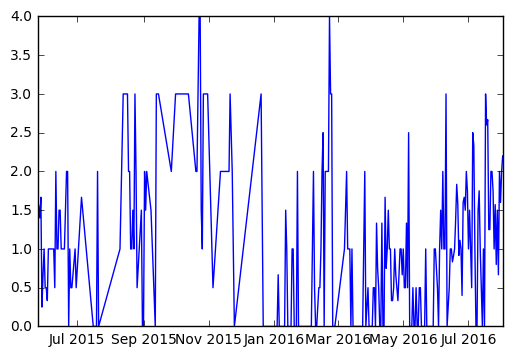

In [52]:
import matplotlib.pyplot as plt
dates = list(set(crohns_df['checkin_date']))
dates.sort()
mean_ratings = []
for date in dates:
    date_df = crohns_df[crohns_df['checkin_date'] == date]
    ratings = pd.to_numeric(date_df[date_df['trackable_name'] == 'Crohn\'s disease']['trackable_value'])
    mean_ratings.append(ratings.values.mean())
plt.plot(dates,mean_ratings)

I wouldn't say that this graph is very informative for the time being.  Would be interesting to take a look again after this winter though, as it looks more consistently high in that September to January range.  Could just be a different person reporting during that time though.

In [82]:
df = pd.read_csv("effectiveness_treatments.csv")
crohns_df = df[(df['condition'] == 'Crohn\'s disease') | (df['condition'] == 'Crohn\'s') ]
crohns_df = crohns_df[np.isfinite(df['effectiveness'])]
print crohns_df.head()

     user_id   age     sex country        condition        treatment  \
319    459.0   NaN  female      US  Crohn's disease           Bentyl   
320    459.0   NaN  female      US  Crohn's disease  Calcium citrate   
321    459.0   NaN  female      US  Crohn's disease        Vitamin d   
342    461.0  38.0    male      US  Crohn's disease           Bentyl   
343    461.0  38.0    male      US  Crohn's disease  Calcium citrate   

     before_value  after_value  effectiveness  
319      1.875000     1.000000       0.875000  
320      1.736842     1.000000       0.736842  
321      1.736842     1.000000       0.736842  
342      1.823529     1.454545       0.368984  
343      1.700000     1.625000       0.075000  


In [83]:
treatments = set(crohns_df['treatment'])
mean_effects = {}
for treatment in treatments:
    treat_df = crohns_df[crohns_df['treatment'] == treatment]
    mean_effects[treatment] = treat_df['effectiveness'].values.mean()

print "the treatments that our users have had the most success with : "
sorted_treatments = sorted(mean_effects.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

the treatments that our users have had the most success with : 
[('Folic acid', 1.26729559748), ('Methotrexate', 1.1818181818200002), ('Bentyl', 0.62199197860950006), ('Colesevelam', 0.45850815850800003), ('Vitamin d', 0.40592105263149997), ('Calcium citrate', 0.40592105263149997), ('Mediterranean Diet', 0.292929292929), ('Placebo', 0.19624060150400002), ('Fexofenadine', 0.18199233716499999), ('Carbomer eye drops', 0.16554054054099998), ('Cetraben cream', 0.16554054054099998), ('thyroid support complex', 0.12121212121200001), ('methotraxate', 0.055555555555600003), ('Questran', 0.0029761904764999819), ('Modulen', -0.084232002331699987), ('Aga', -0.22600619194999999), ('Tacrolimus', -0.22600619194999999), ('Biest', -0.26666666666700001), ('My Goodness Organics meals', -0.26666666666700001), ('Vitamin C', -0.28042328042300002), ('Ritalin', -0.35887988209299998), ('Solifenacin', -0.35887988209299998), ('Feverfew', -0.35887988209299998), ('Probiotic', -0.35887988209299998), ('Passionflower

Positive numbers above mean the user reported less severe symptoms while on the treatment.  Negative numbers mean their symptoms were worse.  But keep in mind that users might be trying more supplements and such during flare-ups which could give an overly negative view of some of these treatments.

Also sample sizes for some of these associations are often very small.

In [4]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Symptom']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Symptom'].groupby('user_id')['trackable_name'].transform('count')
print "distinct symptoms : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users reporting each symptom"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

distinct symptoms : 247

number of users reporting each symptom
[('Diarrhea', 44), ('Abdominal pain', 42), ('Fatigue', 37), ('Stomach Pain', 28), ('Joint pain', 23), ('Anxiety', 22), ('Nausea', 22), ('Depression', 16), ('Headache', 13), ('Stomach cramps', 13), ('Constipation', 13), ('Anemia', 11), ('Back pain', 10), ('Migraine', 10), ('Bloating', 10), ('bowel movements', 10), ('Gas', 9), ('Rectal bleeding', 9), ('Fatigue and tiredness', 9), ('Dizziness', 7), ('Vomiting', 6), ('Anhedonia', 6), ('Crying', 6), ('Pain', 6), ('afternoon sleepiness', 5), ('Insomnia', 5), ('loose stool', 5), ('Agitation', 5), ('skin rashes', 4), ('Bowel Urgency', 4), ('Mucus', 4), ('Dull', 4), ('Muscle pain', 4), ('Joint stiffness', 4), ('Leg pain', 3), ('Bloody Stools', 3), ('Rash', 3), ('Panic', 3), ('Mood swings', 3), ('Acid Reflux', 3), ('Chronic pain', 3), ('Anal itching', 3), ('Weight loss', 3), ('Tingling in hand', 3), ('Night sweats', 3), ('Ankle pain', 3), ('Knee pain', 3), ('Mucus in stool', 3), ('H

In [9]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Symptom']['trackable_name'])
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treat_df_whole = df[df['trackable_name'] == treatment]
    treatment_counts[treatment] = float(len(treat_df.groupby('user_id'))) / float(len(treat_df_whole.groupby('user_id'))) * 100
print "specificity of each symptom to crohns (the percentage of users reporting this symptom that suffer from crohns)"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treat_df_whole = df[df['trackable_name'] == treatment]
    treatment_counts[treatment] = float(len(treat_df.groupby('user_id'))) * (float(len(treat_df.groupby('user_id'))) / float(len(treat_df_whole.groupby('user_id'))))
    
print ""
print "normalized symptom count (the number of crohns users suffering from this condition, multiplied by how specific to crohns it is)"
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

specificity of each symptom to crohns (the percentage of users reporting this symptom that suffer from crohns)
[('Gastric Pain', 100.0), ('thumb pain', 100.0), ('sleep deprivation', 100.0), ('anal inflamation', 100.0), ('Seton Drain', 100.0), ('back muscle spasm', 100.0), ('Stool color & texture changes', 100.0), ('Anal soreness', 100.0), ('iron deficency', 100.0), ('Good poo', 100.0), ('Sun burn', 100.0), ('Craving red meat', 100.0), ('overall pain levels', 100.0), ('chilly finger', 100.0), ('nutrient deficiency', 100.0), ('itchy privates', 100.0), ('achilles tendon pain', 100.0), ('Craving salty food', 100.0), ('urgency', 100.0), ('Body pain', 66.66666666666666), ('Fluctuating Weight', 50.0), ('Tremoring', 50.0), ('TMJ pain', 50.0), ('Supraventricular Tachycardia', 50.0), ('Mobility', 50.0), ('FBGL', 50.0), ('Meteorism', 50.0), ('Sperm Color', 50.0), ('Pain after evacuation', 50.0), ('Limb pain', 50.0), ('Blisters', 50.0), ('Groin pain', 50.0), ('Interest', 50.0), ('Diarrhoea', 50.0)

## Immune Condition associations

Crohn's can be considered an effect of a greater auto-immune problem.  How related is it to other auto-immune diseases?  Let's use Peer Karmaus's annotations of find which conditions might be related to Crohn's.

To start I'm going to look at the whole "Immune" Family, which includes immunity effecting disease, as it seems plausible that some viruses could be related to auto-immune disease in some way.

In [25]:
anno_df = pd.read_csv("conditions_list.csv")
anno_df.head()

,trackable_id,Count,Condition,New Name,Family,Group,Pot. Problem,Comments
0,163,416,Acid Reflux,Acid reflux,Physical,Enteric,NaN,NaN
1,651,8,Abdominal aortic aneurysm,Aortic Aneurysm,Cardiac,Blood,NaN,NaN
2,866,11,Abdominal Migraines,Migraine,Pain,Enteric,NaN,NaN
3,520,16,Abdominal pain,Pain,Physical,Pain,NaN,NaN
4,133,615,GERD,Acid reflux,Physical,Enteric,NaN,NaN


In [26]:
immune_df = anno_df[anno_df['Family'] == 'Immune']
print immune_df.head()
print ""
print str(len(immune_df)) + " immune conditions"
print str(len(set(immune_df['New Name']))) + " distinct immune conditions"
print ""
print set(immune_df['New Name'])

    trackable_id  Count              Condition           New Name  Family  \
8            458     12    Achilles tendinitis         Tendonitis  Immune   
9            566     12    Achilles Tendonitis         Tendonitis  Immune   
14            90     12        Acute sinusitis          Sinusitis  Immune   
23           746      5  Adult Still's disease      Still disease  Immune   
27           854    109      Allergic Rhinitis  Allergic rhinitis  Immune   

           Group Pot. Problem     Comments  
8   Inflammation          NaN          NaN  
9   Inflammation          NaN          NaN  
14  Inflammation          NaN          NaN  
23  Inflammation            X  Autoimmune?  
27       Allergy          NaN          NaN  

131 immune conditions
73 distinct immune conditions

set([nan, 'Cold sore', 'Allergy', 'Asthma', 'Allergies', 'IBD', 'Hepatitis', "Hashimoto's disease", 'Sinusitis', 'Inflammation', 'Food allergy', 'IBS', 'Strep throat', 'Hay fever', 'Chondromalacia patella', 'Rash'

In [27]:
print "The annotations allow us to combine synoymous conditions, for example:"
print immune_df[immune_df['New Name'] == 'Crohn\'s disease']
crohns_names = immune_df[immune_df['New Name'] == 'Crohn\'s disease']['Condition'].values
print ""
print "names for Crohn's :"
print crohns_names
print ""
print "users with all trackables for crohns :"
print len(df[df['trackable_name'].isin(crohns_names)])

The annotations allow us to combine synoymous conditions, for example:
     trackable_id  Count        Condition         New Name  Family    Group  \
144           517      7          Chron's  Crohn's disease  Immune  Enteric   
159             2    858  Crohn's disease  Crohn's disease  Immune  Enteric   
208           616      4   Crohns Disease  Crohn's disease  Immune  Enteric   
209           125     20           Crohns  Crohn's disease  Immune  Enteric   

    Pot. Problem Comments  
144            X      IBD  
159          NaN      IBD  
208          NaN      IBD  
209          NaN      IBD  

names for Crohn's :
["Chron's" "Crohn's disease" 'Crohns Disease' 'Crohns']

users with all trackables for crohns :
886


In [87]:
anno_df = pd.read_csv("conditions_list.csv")
immune_df = anno_df[anno_df['Family'] == 'Autoimmune']
immune_conditions = set(immune_df['Condition'])
all_conditions = set(anno_df['Condition'])

def findCorrelationBetweenConditions(targetCondition, allOtherConditions):
    
    #create a df of all users with any trackable that represents the target condition
    #not grouping by date this time, because I don't care if the conditions are concurrent, I want to know if people afflicted by the target condition have ever suffered from other conditions
    condition_names = anno_df[anno_df['New Name'] == targetCondition]['Condition'].values
    condition_df = df.groupby(['user_id']).filter(lambda x: len(set(x['trackable_name'].values) & set(condition_names)) > 0)

    #the names of any trackable that represents all of the other conditions that we are comparing to
    other_condition_names = df[df['trackable_name'].isin(allOtherConditions)]['trackable_name'].values
    
    #create a count of how many users have each condition
    condition_df['condition_count'] = condition_df[condition_df['trackable_type'] == 'Condition'].groupby('user_id')['trackable_name'].transform('count')
    
    #add the counts to a dictionary and sort
    condition_counts = {}
    condition_counts_normalized = {}
    for condition in other_condition_names:
        c_df = condition_df[condition_df['trackable_name'] == condition]
        if (len(c_df.groupby('user_id')) > 0) and (condition not in condition_names):
            #we want to normalize the condition counts by how common the condition is, so that very common conditions like fatigue and anxiety get scaled down
            all_affected_count = len(df[df['trackable_name'] == condition].groupby('user_id'))
            condition_counts_normalized[condition] = float(len(c_df.groupby('user_id'))) / float(all_affected_count)
            condition_counts[condition] = len(c_df.groupby('user_id'))

    import operator 
    sorted_condition = sorted(condition_counts_normalized.items(), key=operator.itemgetter(1), reverse=True)
    return condition_counts,condition_counts_normalized,sorted_condition
    
immune_total,immune_normalized,immune_sorted = findCorrelationBetweenConditions('Crohn\'s disease', immune_conditions)
all_total,all_normalized,all_sorted = findCorrelationBetweenConditions('Crohn\'s disease', all_conditions)
print "immunity related conditions suffered by people with crohns"
print immune_sorted
print ""
print "all conditions suffered by people with crohns"
print all_sorted
print "number of people with crohns suffering from immune conditions, divided by total number of people suffering from same conditions : " + str(np.mean(immune_normalized.values()))

immunity related conditions suffered by people with crohns
[('arthrtis', 0.2), ('Juvenile rheumatoid arthritis', 0.18181818181818182), ('Psoriasis', 0.14285714285714285), ('Arthritis', 0.12307692307692308), ('Rheumatoid arthritis', 0.08333333333333333), ('Multiple sclerosis', 0.07692307692307693), ('Celiac disease', 0.04878048780487805), ('Lupus', 0.046511627906976744)]

all conditions suffered by people with crohns
[('Infilmation', 1.0), ('synesthesia', 1.0), ('PCOS', 1.0), ('Premature ventricular contractions', 1.0), ('Bipolar High', 1.0), ('FODMaP sensitivity', 1.0), ('First degree hemorrhoids', 1.0), ('Esophageal hernia', 1.0), ('Osteitis Pubis', 1.0), ('Internal hemorrhoids', 1.0), ('Rectovaginal fistula', 1.0), ('Atypical chest pain', 1.0), ('CFS', 1.0), ('Body pain', 0.6666666666666666), ('Systemic mastocytosis', 0.5), ('Secondary hypertension', 0.5), ('Low oxygen saturation', 0.5), ('lymphocytic colitis', 0.5), ('Uveitis', 0.5), ('Urethra pains', 0.5), ('Bile Acid Malabsorption

There are more non-auto-immune conditions being suffered by Crohn's patients than autoimmune conditions.  But this makes sense as many of the conditions such as abdominal pains are associated with Crohn's.

Trying to measure the correlation between individual conditions suffers from a huge number of uncertain decisions.  I need to look at it this from another angle.  If you have Crohn's what are the odds that you have another immunity related disease, compared with the general Flaredown population?  

In [100]:
df = pd.read_csv("flaredown_trackable_data_080316.csv")
anno_df = pd.read_csv("conditions_list.csv")

immune_df = anno_df[(anno_df['Group'] == 'Autoimmune')]
immune_names = set(immune_df['Condition'])
crohns_names = anno_df[anno_df['New Name'] == 'Crohn\'s disease']['Condition'].values

#remove crohn's from the list of immune conditions
for name in crohns_names:
    if name in immune_names: immune_names.remove(name)

#this time, we use the annotations to grab the crohns/noncrohns groups
crohns_df = df.groupby('user_id').filter(lambda x: any(x['trackable_name'].isin(crohns_names)))
noncrohns_df = df.groupby('user_id').filter(lambda x: not any(x['trackable_name'].isin(crohns_names)))

#count of all users with crohns
crohns_users_total = len(crohns_df.groupby('user_id'))

#count of all users without crohns
noncrohns_users_total = len(noncrohns_df.groupby('user_id'))

#count of users with crohns as well as another immune condition
crohns_users_immune_condition = len(crohns_df.groupby('user_id').filter(lambda x: any(x['trackable_name'].isin(immune_names))).groupby('user_id'))

#count of users with crohns and no other immune conditions
crohns_users_no_immune_condition = len(crohns_df.groupby('user_id').filter(lambda x: not any(x['trackable_name'].isin(immune_names))).groupby('user_id'))

#count of users without crohns that have another immune condition
noncrohns_users_immune_condition = len(noncrohns_df.groupby('user_id').filter(lambda x: any(x['trackable_name'].isin(immune_names))).groupby('user_id'))

#count of users with no immune conditions
noncrohns_users_no_immune_condition = len(noncrohns_df.groupby('user_id').filter(lambda x: not any(x['trackable_name'].isin(immune_names))).groupby('user_id'))

#the total number of users reporting auto immune conditions
total_autoimmune_users = crohns_users_immune_condition + noncrohns_users_immune_condition

#the total number of users
total_users = crohns_users_total + noncrohns_users_total

#the total number of users without autoimmune conditions
total_nonautoimmune_users = total_users - total_autoimmune_users

print crohns_users_total
print noncrohns_users_total
print crohns_users_immune_condition
print crohns_users_no_immune_condition
print noncrohns_users_immune_condition
print noncrohns_users_no_immune_condition
print total_autoimmune_users
print total_users


130
1680
27
103
314
1366
341
1810


Null Hypothesis: Reporting Crohn's disease on Flaredown does not increase the likelyhood that you will report other autoimmune conditions that are not related to Crohn's disease.

|             | Auto-Immune   | No-Auto-Immune  | Total |
| ----------- |:-------------:|:---------------:|:-----:|
| Crohns      | 27            | 103             |130    |
| Non-Crohnn  | 314           | 1366            | 1680  |
| Total       | 341           | 1469            |1810   |

In [119]:
from math import pow
expected_crohns_autoimmune = float(total_autoimmune_users) * (float(crohns_users_total) / float(total_users))
expected_noncrohns_autoimmune = float(total_autoimmune_users) * (float(noncrohns_users_total) / float(total_users))
expected_crohns_nonautoimmune = float(total_nonautoimmune_users) * (float(crohns_users_total) / float(total_users))
expected_noncrohns_nonautoimmune = float(total_nonautoimmune_users) * (float(noncrohns_users_total) / float(total_users))

from scipy.stats import chisquare
observations = np.array([[crohns_users_immune_condition, crohns_users_no_immune_condition], [noncrohns_users_immune_condition, noncrohns_users_no_immune_condition]]).T
#obs = [crohns_users_immune_condition, crohns_users_no_immune_condition, noncrohns_users_immune_condition, noncrohns_users_no_immune_condition]

expected = np.array([[expected_crohns_autoimmune,expected_crohns_nonautoimmune],[expected_noncrohns_autoimmune,expected_noncrohns_nonautoimmune]]).T
#expected = [expected_crohns_autoimmune,expected_crohns_nonautoimmune,expected_noncrohns_autoimmune,expected_noncrohns_nonautoimmune]

chi = chisquare(observations, f_exp=expected, axis=0)
#sanity check
#chi = float((crohns_users_immune_condition - expected_crohns_autoimmune)**2) / float(expected_crohns_autoimmune) + float((crohns_users_no_immune_condition - expected_crohns_nonautoimmune)**2) / float(expected_crohns_nonautoimmune)

print chi

Power_divergenceResult(statistic=array([ 0.31651346,  0.02449211]), pvalue=array([ 0.5737105 ,  0.87563926]))


I can't reject the null hypothesis.  It's not definitive either way.  Setting a reminder to try this again in one year's time.